<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/Python%202023/Caso_09_Teor%C3%ADa_de_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Desarrollar ejercicios para encontrar la probabilidad de eventos de un espacio muestral.


# Descripción

Construir ejercicios de probabilidad conforme a partir de datos conforme la teoría de probabilidad.

A partir de un conjunto de datos generados estimar y determinar las probabilidades.

# Marco teórico

Para cuando los espacios muestrales tienen un espacio finito o un número de elementos finito, la probabilidad de ocurrencia de un evento que resulta de tal experimento estadístico se evalúa utilizando un conjunto de números reales denominados pesos o probabilidades, que van de 0 a 1.

Para todo punto en el espacio muestral se asigna una probabilidad tal que la suma de todas las probabilidades es 1.

Si se tiene certeza para creer que al llevar a cabo el experimento es bastante probable que ocurra cierto punto muestral, le tendríamos que asignar a éste una probabilidad cercana a uno. Por el contrario, si se cree que no hay probabilidades de que ocurra cierto punto muestral, se tendría que asignar a éste una probabilidad cercana a cero.

En un espacio muestral en donde todos los puntos muestrales tienen la misma oportunidad de ocurrencia, por lo tanto, se les asignan probabilidades iguales.

A los puntos fuera del espacio muestral, es decir, a los eventos simples que no tienen posibilidades de ocurrir, se les asigna una probabilidad de cero.

Entonces: La probabilidad de un evento A debe estar entre cero y uno

$$
0 \le P(A) \le 1
$$

La probabilidad de todo el espacio muestral S debe ser uno $$
P(S) = 1
$$

La probabilidad de que no ocurra un evento es cero

$$
p(\phi) = 0
$$

Ejemplo: lanzar un dado. La probabilidad de que caiga un 1, un 2, un 3 un 4 un 5 un 6 es la misma para cada elemento. Siendo S el espacio muestral, cual es la probabilidad de que al lanzar un dado a una mesa, el valor del mismo cara arriba sea un 5?, y ¿cuál es la probabilidad de que sea un 7?

¿Cuántas veces está el 5 en el espacio muestral S?. Una sola vez.

¿Cuántas veces está el 7 en el espacio muestral S?. Ninguna

Entonces dividir el número de ocurrencias del 5 entre el número total de elementos N.

$$
prob = \frac{f}{n}
$$

En términos porcentuales sería:

$$
prob = \frac{f}{n} \times 100
$$

# Desarrollo

## Cargar librerías

In [86]:
# Cargar librerías
import numpy as fn
import math as mt # Para utilizar factorial
from itertools import permutations
from itertools import product
from itertools import combinations
from itertools import combinations_with_replacement
import pandas as pd
import matplotlib.pyplot as plt


## Ejemplo del dado

¿Cual es la probabildia de que al lanzar un dado sea 5 cara arriba?: $1/6=0.1616\approx16.66\%$

In [87]:
dado = [1, 2, 3, 4, 5, 6]
n = len(dado)
print("Total del espacio muestral ", n)

# Contar cuántas veces aparece el número 5
f_cuantas = dado.count(5)
print("Cuantas veces aparece el número 5:", f_cuantas)
print("La probabilidad de que al lanzar el dado sea cinco es : ", f_cuantas,"/",n,"=",fn.round(f_cuantas/n, 4),"≈",fn.round(f_cuantas/n * 100,2), "%")



Total del espacio muestral  6
Cuantas veces aparece el número 5: 1
La probabilidad de que al lanzar el dado sea cinco es :  1 / 6 = 0.1667 ≈ 16.67 %


## Lanzar dos dados

¿Que probabilidad existe de que al lanzar los dos dados de que salga 10 la suma de los valores de los dos dados?.

Se necesita permutacones sin repetición.



In [88]:
dado = [1, 2, 3, 4, 5, 6]
n = len(dado)
r = 2 # ¿cómo agrupar?, de dos en dos porque hay dos dados

n_PrR = n**r

print("Existen ", n_PrR , " posibles permutaciones con repetición del total de ", n , " al lanzar dos dados")

print("Aquí las permutaciones con repetición de dos dados y la suma de los dos dados")

# Calcular las permutaciones con repetición
permutaciones_dados = product(dado, repeat=r)

# Convertir a data.frame con pandas pd
tabla = pd.DataFrame(permutaciones_dados, columns=['Dado1', 'Dado2'])
# print(tabla)

# Agregar la columna suma
tabla['suma'] = (tabla['Dado1'] + tabla['Dado2'])
print(tabla)

print("Contar en cuántas ocasiones hay la suma 10")

f_cuantas = tabla[tabla['suma'] == 10].shape[0]
print("Frecuencia en que la suma es 10:", f_cuantas)
print("La probabilidad de que al lanzar dos dados la suma de 10 es: ", f_cuantas,"/",n_PrR,"=",fn.round(f_cuantas/n_PrR, 4),"≈",fn.round(f_cuantas/n_PrR * 100,2), "%")


Existen  36  posibles permutaciones con repetición del total de  6  al lanzar dos dados
Aquí las permutaciones con repetición de dos dados y la suma de los dos dados
    Dado1  Dado2  suma
0       1      1     2
1       1      2     3
2       1      3     4
3       1      4     5
4       1      5     6
5       1      6     7
6       2      1     3
7       2      2     4
8       2      3     5
9       2      4     6
10      2      5     7
11      2      6     8
12      3      1     4
13      3      2     5
14      3      3     6
15      3      4     7
16      3      5     8
17      3      6     9
18      4      1     5
19      4      2     6
20      4      3     7
21      4      4     8
22      4      5     9
23      4      6    10
24      5      1     6
25      5      2     7
26      5      3     8
27      5      4     9
28      5      5    10
29      5      6    11
30      6      1     7
31      6      2     8
32      6      3     9
33      6      4    10
34      6      5    11
35    

### Juego de Black Jack

Se reparten dos barajas de tipo inglesa y el jugador debe sumar los valores numéricos de las dos barajas.

La pregunta es: ¿qué probabilidad existe de que al recibir dos cartas de una baraja de 52 cartas modalidad inglesa la suma de las dos cartas sea 20? y ¿cuántas y cuál es la probabilidad de que la suma sea 21?

Criterios de la numeración:
-   El As vale 11 puntos (aunque pudiera valer 1 punto).
-   Los valores numérico valen lo que indica la carta.
-   Las cartas de figuras o monos (J, Q y K) valen 10 puntos.


In [89]:
baraja = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
n = len(baraja)
r = 2 # ¿cómo agrupar?, de dos en dos porque se reparten dos barajas

n_PrR = n**r

print("Existen ", n_PrR , " posibles permutaciones con repetición del total de ", n , " al seleccionar dos barajas de tipo inglesa")

print("Aquí las permutaciones con repetición de dos barjas y la suma de los puntos")

# Calcular las permutaciones con repetición
permutaciones = product(baraja, repeat=r)

# Convertir a data.frame con pandas pd
tabla = pd.DataFrame(permutaciones, columns=['Carta1', 'Carta2'])
# print(tabla)

tabla['Puntos C1'] = [11 if carta == 'A' else 10 if carta in ['J', 'Q', 'K'] else int(carta) for carta in tabla['Carta1']]

# Agregar la columna Puntos C2 dependiendo de la carta
tabla['Puntos C2'] = [11 if carta == 'A' else 10 if carta in ['J', 'Q', 'K'] else int(carta) for carta in tabla['Carta2']]

# Calcular la suma de puntos de las dos cartas
tabla['suma'] = tabla['Puntos C1'] + tabla['Puntos C2']

# Mostrar la tabla
print(tabla)

print("Contar en cuántas ocasiones hay la suma 20 y 21")

f_cuantas_20 = tabla[tabla['suma'] == 20].shape[0]
f_cuantas_21 = tabla[tabla['suma'] == 21].shape[0]

# De suma igual a 20
print("Frecuencia en que la suma es 20:", f_cuantas_20)
print("La probabilidad de que al seleccionar dos cartas la suma sea 20 es: ", f_cuantas_20,"/",n_PrR,"=",fn.round(f_cuantas_20/n_PrR, 4),"≈",fn.round(f_cuantas_20/n_PrR * 100,2), "%")
print("\n")
# De suma igual a 21
print("Frecuencia en que la suma es 21:", f_cuantas_21)
print("La probabilidad de que al seleccionar dos cartas la suma sea 21 es: ", f_cuantas_21,"/",n_PrR,"=",fn.round(f_cuantas_21/n_PrR, 4),"≈",fn.round(f_cuantas_21/n_PrR * 100,2), "%")

Existen  169  posibles permutaciones con repetición del total de  13  al seleccionar dos barajas de tipo inglesa
Aquí las permutaciones con repetición de dos barjas y la suma de los puntos
    Carta1 Carta2  Puntos C1  Puntos C2  suma
0        A      A         11         11    22
1        A      2         11          2    13
2        A      3         11          3    14
3        A      4         11          4    15
4        A      5         11          5    16
..     ...    ...        ...        ...   ...
164      K      9         10          9    19
165      K     10         10         10    20
166      K      J         10         10    20
167      K      Q         10         10    20
168      K      K         10         10    20

[169 rows x 5 columns]
Contar en cuántas ocasiones hay la suma 20 y 21
Frecuencia en que la suma es 20: 18
La probabilidad de que al seleccionar dos cartas la suma sea 20 es:  18 / 169 = 0.1065 ≈ 10.65 %


Frecuencia en que la suma es 21: 8
La probabilidad d

## Diagrama de barra

Construir un diagrama de barra con al variable suma de la tabla de la selección de dos barajas.


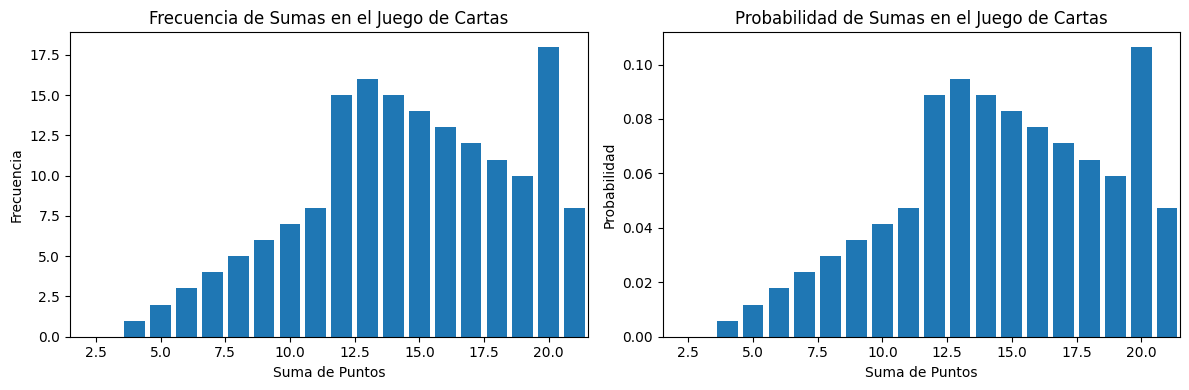

In [90]:
# Calcular la frecuencia de las sumas
frecuencia_suma = tabla['suma'].value_counts().sort_index()

# Calcular la probabilidad de cada suma
probabilidad_suma = frecuencia_suma / n_PrR

# Crear dos subplots en el mismo renglón
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de barras de frecuencia de sumas
axs[0].bar(frecuencia_suma.index, frecuencia_suma.values)
axs[0].set_xlabel('Suma de Puntos')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Frecuencia de Sumas en el Juego de Cartas')

# Gráfico de barras de probabilidad de sumas
axs[1].bar(probabilidad_suma.index, probabilidad_suma.values)
axs[1].set_xlabel('Suma de Puntos')
axs[1].set_ylabel('Probabilidad')
axs[1].set_title('Probabilidad de Sumas en el Juego de Cartas')

# Ajustar el rango del eje x en ambos gráficos
for ax in axs:
    ax.set_xlim(1.5, 21.5)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


### Ruleta

La ruleta tiene 39 números en colores negro y rojo ¿que probabilidad existe de que al dar vuelta se detenga en un valor en específico?

¿Cuál es la la probabilidad de que al darle vuelta la ruleta se detenga en un valor específico es por ejemplo en la casilla "20 Negro"?. Resp: $1/72=0.0138\approx1.38\%$.

¿Cuál es la probabilidad de que salga un color negro?. Resp:  $2/72=0.0277\approx2.77\%$.

¿Cuál es la probabilida de que sea un valor par en color negro?. Resp $18/72=0.25\approx25\%$:

¿Cuál es la probabilidad de que sea un valor entre 12 y 18 de color rojo?. Resp: $7/72=0.0972\approx9.72\%$

Utilizando técica de conteo de multiplicación $36 \times 2 = 72$


In [91]:
# Crear una secuencia del 1 al 36
numeros_negros = list(range(1, 37))
numeros_rojos = list(range(1, 37))
ruleta = numeros_negros + numeros_rojos
print(ruleta)
n = len(ruleta)

print(ruleta)
print("Existen ", n , " posibles posibles casillas de la ruleta")

# Cuantas casillas 20 negro
f_cuantas = 1
print("Frecuencia en de que salga el 20 negro:", f_cuantas)
print("La probabilidad de que al dar vuelta a la ruleta se detenga en 20 negro: ", f_cuantas,"/",n,"=",fn.round(f_cuantas/n, 4),"≈",fn.round(f_cuantas/n * 100,2), "%")
print("\n")

# Cuántas casillas de color negro
f_cuantas = (n/2)
print("Frecuencia en de que salga casilla en negro:", f_cuantas)
print("La probabilidad de que al dar vuelta a la ruleta se detenga en color negro: ", f_cuantas,"/",n,"=",fn.round(f_cuantas/n, 4),"≈",fn.round(f_cuantas/n * 100,2), "%")
print("\n")

# Cuántas casillas par negro
f_cuantas = ((n / 2) / 2)
print("Frecuencia en de que salga casilla en número par color negro:", f_cuantas)
print("La probabilidad de que al dar vuelta a la ruleta se detenga en número par color negro: ", f_cuantas,"/",n,"=",fn.round(f_cuantas/n, 4),"≈",fn.round(f_cuantas/n * 100,2), "%")
print("\n")

# de que salga una casilla en un rango de 12 a 18 ya sea negro o rojo
# 7 * 2
f_cuantas = len(list(range(12, 18)) * 2)
print("Frecuencia en de que salga casilla 12-18 negro o rojo:", f_cuantas)
print("La probabilidad de que al dar vuelta a la ruleta se detenga un valor 12-18 rojo o negro: ", f_cuantas,"/",n,"=",fn.round(f_cuantas/n, 4),"≈",fn.round(f_cuantas/n * 100,2), "%")
print("\n")


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
Existen  72  posibles posibles casillas de la ruleta
Frecuencia en de que salga el 20 negro: 1
La probabilidad de que al dar vuelta a la ruleta se detenga en 20 negro:  1 / 72 = 0.0139 ≈ 1.39 %


Frecuencia en de que salga casilla en negro: 36.0
La probabilidad de que al dar vuelta a la ruleta se detenga en color negro:  36.0 / 72 = 0.5 ≈ 50.0 %


Frecuencia en de que salga casilla en número par color negro: 18.0
La probabilidad de que al dar vuelta a la

## Juego de dominó y repartir 7 fichas

El juego de dominó consiste en que de una cantidad de 28 fichas se reparten siete de ellas a cada jugador.

Uno de los variantes del dominó es contar los puntos de cada ficha, siendo los puntos la cantidad de puntos negros que tiene cada ficha.

Para este ejercicio se pide:

¿Cual es la probabilidad de que la suma de puntos de las siete fichas repartidas sea manor a 15 puntos?

¿Cuál es la probabilidad de que la suma de los puntos de las siete fichas sea mayor a 60 puntos?

¿Cual es la probabilidad de que al repartir siete fichas de dominó la suma total esté 30 y 40 puntos?. Siendo los puntos los puntos negros de cada ficha?.

¿Cual será el rango o intervalo de clase conforme a la suma de puntos existe mayor probabilidad de obtener esos puntos?

In [98]:
# Se crean las 28 fichas de dominó
puntos = ['0', '1', '2', '3', '4', '5','6']

r = 2 # cada ficha tiene 2 caras
fichas = list(combinations_with_replacement(puntos, r))

print("Las fichas de dominó: ")
for f in fichas:
  print(f)

# Ahora las combinaciones de 7 fichas de entre las 28
r = 7    # Se reparte 7 fichas
n=28
print("Las combinaciones de las ",  n,  "fichas en grupos de ", r)

combinaciones = list(combinations(fichas, r))
#for combinaciones in combinaciones:
#  print(combinaciones)
tabla = pd.DataFrame(combinaciones, columns=['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7'])
print(tabla)

n = len(tabla) # Ahora n vale 1184040

print("Son las posibles combinaciones de repartir 7 fichas de entre 28 posibles")
print("Hay ", n, "posibles reparticiones")

print ("Tabla con sumas")
print("Hacer un recorrido en la tabla para encontrar las sumas")



Las fichas de dominó: 
('0', '0')
('0', '1')
('0', '2')
('0', '3')
('0', '4')
('0', '5')
('0', '6')
('1', '1')
('1', '2')
('1', '3')
('1', '4')
('1', '5')
('1', '6')
('2', '2')
('2', '3')
('2', '4')
('2', '5')
('2', '6')
('3', '3')
('3', '4')
('3', '5')
('3', '6')
('4', '4')
('4', '5')
('4', '6')
('5', '5')
('5', '6')
('6', '6')
Las combinaciones de las  28 fichas en grupos de  7
             F1      F2      F3      F4      F5      F6      F7
0        (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (0, 6)
1        (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (1, 1)
2        (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (1, 2)
3        (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (1, 3)
4        (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (1, 4)
...         ...     ...     ...     ...     ...     ...     ...
1184035  (3, 5)  (3, 6)  (4, 4)  (4, 5)  (5, 5)  (5, 6)  (6, 6)
1184036  (3, 5)  (3, 6)  (4, 4)  (4, 6)  (5, 5)  (5, 6)  (6, 6)
1184037  (3, 5)  (3, 6)  (4, 5)  (4, 6)  

In [93]:
tabla_sumas = tabla.copy()  # Copia el DataFrame original
sumas = []
for r in range(0, n):
  suma = 0
  for ficha in tabla.iloc[r]:
    #print(ficha)
    for punto in ficha:
      suma += int(punto)
  sumas.append(suma)

tabla_sumas['suma'] = sumas
print(tabla_sumas)

print("Este código tarda aproximadamente de 32 a 35 segundos en hacer las sumas")

             F1      F2      F3      F4      F5      F6      F7  suma
0        (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (0, 6)    21
1        (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (1, 1)    17
2        (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (1, 2)    18
3        (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (1, 3)    19
4        (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (1, 4)    20
...         ...     ...     ...     ...     ...     ...     ...   ...
1184035  (3, 5)  (3, 6)  (4, 4)  (4, 5)  (5, 5)  (5, 6)  (6, 6)    67
1184036  (3, 5)  (3, 6)  (4, 4)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    68
1184037  (3, 5)  (3, 6)  (4, 5)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    69
1184038  (3, 5)  (4, 4)  (4, 5)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    68
1184039  (3, 6)  (4, 4)  (4, 5)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    69

[1184040 rows x 8 columns]
Este código tarda aproximadamente de 32 a 35 segundos en hacer las sumas


In [102]:
tabla_sumas = tabla.copy()  # Copia el DataFrame original

sumas = []

for index, row in tabla.iterrows():
    suma = 0

    # Recorre la lista y suma los valores de las fichas
    for puntos in row:
        # Convierte los puntos en números enteros y suma
        suma += int(puntos[0]) + int(puntos[1])

    # Agrega la suma a la lista sumas
    sumas.append(suma)

# Agrega la lista sumas como una nueva columna en el DataFrame copiado
tabla_sumas['suma'] = sumas

# Imprime la tabla con la columna de sumas
print(tabla_sumas)



             F1      F2      F3      F4      F5      F6      F7  suma
0        (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (0, 6)    21
1        (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (1, 1)    17
2        (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (1, 2)    18
3        (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (1, 3)    19
4        (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (1, 4)    20
...         ...     ...     ...     ...     ...     ...     ...   ...
1184035  (3, 5)  (3, 6)  (4, 4)  (4, 5)  (5, 5)  (5, 6)  (6, 6)    67
1184036  (3, 5)  (3, 6)  (4, 4)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    68
1184037  (3, 5)  (3, 6)  (4, 5)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    69
1184038  (3, 5)  (4, 4)  (4, 5)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    68
1184039  (3, 6)  (4, 4)  (4, 5)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    69

[1184040 rows x 8 columns]


Con la tabla que contiene las sumas de cada grupo de siete fichas responder a las preguntas:

¿Cual es la probabilidad de que la suma de puntos de las siete fichas repartidas sea manor o igual a 15 puntos?

In [115]:
valor_a_comparar = 15
cuales = tabla_sumas[tabla_sumas['suma'] <= valor_a_comparar]
print(cuales)
f_cuantas = len(cuales)
print("Son ",f_cuantas, "las combinaciones de ",r,"fichas de dominó en donde la suma menor o igual a ", valor_a_comparar)
print("La probabilidad es de ", f_cuantas,"/",n,"=",fn.round(f_cuantas/n, 8),"≈",fn.round(f_cuantas/n * 100,8), "%")
print("\n")

         F1      F2      F3      F4      F5      F6      F7  suma
43   (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (1, 1)  (1, 2)    15
694  (0, 0)  (0, 1)  (0, 2)  (0, 3)  (1, 1)  (1, 2)  (1, 3)    15
698  (0, 0)  (0, 1)  (0, 2)  (0, 3)  (1, 1)  (1, 2)  (2, 2)    15
Son  3 las combinaciones de  7 fichas de dominó en donde la suma menor o igual a  15
La probabilidad es de  3 / 1184040 = 2.53e-06 ≈ 0.00025337 %




¿Cuál es la probabilidad de que la suma de los puntos de las siete fichas sea mayor o igual a 60 puntos?


In [116]:
valor_a_comparar = 60
cuales = tabla_sumas[tabla_sumas['suma'] >= valor_a_comparar]
print(cuales)
f_cuantas = len(cuales)
print("Son ",f_cuantas, "las combinaciones de ",r,"fichas de dominó en donde la suma mayor o igual a", valor_a_comparar)
print("La probabilidad es de ", f_cuantas,"/",n,"=",fn.round(f_cuantas/n, 8),"≈",fn.round(f_cuantas/n * 100,8), "%")
print("\n")

             F1      F2      F3      F4      F5      F6      F7  suma
295793   (0, 0)  (2, 6)  (3, 6)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    60
295799   (0, 0)  (2, 6)  (4, 5)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    60
295996   (0, 0)  (3, 5)  (3, 6)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    60
296002   (0, 0)  (3, 5)  (4, 5)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    60
296007   (0, 0)  (3, 6)  (4, 4)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    60
...         ...     ...     ...     ...     ...     ...     ...   ...
1184035  (3, 5)  (3, 6)  (4, 4)  (4, 5)  (5, 5)  (5, 6)  (6, 6)    67
1184036  (3, 5)  (3, 6)  (4, 4)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    68
1184037  (3, 5)  (3, 6)  (4, 5)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    69
1184038  (3, 5)  (4, 4)  (4, 5)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    68
1184039  (3, 6)  (4, 4)  (4, 5)  (4, 6)  (5, 5)  (5, 6)  (6, 6)    69

[5714 rows x 8 columns]
Son  5714 las combinaciones de  7 fichas de dominó en donde la suma mayor o igual a 60
La probabilidad es de  5714 / 1184040 = 0.004825

¿Cual es la probabilidad de que al repartir siete fichas de dominó la suma total esté 30 y 40 puntos?. Siendo los puntos los puntos negros de cada ficha?.

In [118]:
valor_a_comparar1 = 30
valor_a_comparar2 = 40
cuales = tabla_sumas[(tabla_sumas['suma'] >= valor_a_comparar1) & (tabla_sumas['suma'] <= valor_a_comparar2)]
print(cuales)
f_cuantas = len(cuales)
print("Son ",f_cuantas, "las combinaciones de ",r,"fichas de dominó en donde la suma esté entre", valor_a_comparar1,"-",valor_a_comparar2)
print("La probabilidad es de ", f_cuantas,"/",n,"=",fn.round(f_cuantas/n, 8),"≈",fn.round(f_cuantas/n * 100,8), "%")
print("\n")

             F1      F2      F3      F4      F5      F6      F7  suma
207      (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (2, 6)  (6, 6)    30
231      (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (3, 5)  (6, 6)    30
236      (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (3, 6)  (5, 6)    30
237      (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (3, 6)  (6, 6)    31
242      (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (4, 4)  (6, 6)    30
...         ...     ...     ...     ...     ...     ...     ...   ...
1153605  (1, 4)  (1, 5)  (2, 2)  (2, 3)  (2, 4)  (3, 3)  (4, 4)    40
1153657  (1, 4)  (1, 5)  (2, 2)  (2, 3)  (2, 5)  (3, 3)  (3, 4)    40
1156585  (1, 4)  (1, 6)  (2, 2)  (2, 3)  (2, 4)  (2, 5)  (3, 3)    40
1156605  (1, 4)  (1, 6)  (2, 2)  (2, 3)  (2, 4)  (3, 3)  (3, 4)    40
1159597  (1, 4)  (2, 2)  (2, 3)  (2, 4)  (2, 5)  (3, 3)  (3, 4)    40

[450520 rows x 8 columns]
Son  450520 las combinaciones de  7 fichas de dominó en donde la suma esté entre 30 - 40
La probabilidad es de  450520 / 1184040 = 0.

¿Cual será el rango o intervalo de clase conforme a la suma de puntos existe mayor probabilidad de obtener esos puntos?

Hacer un historama


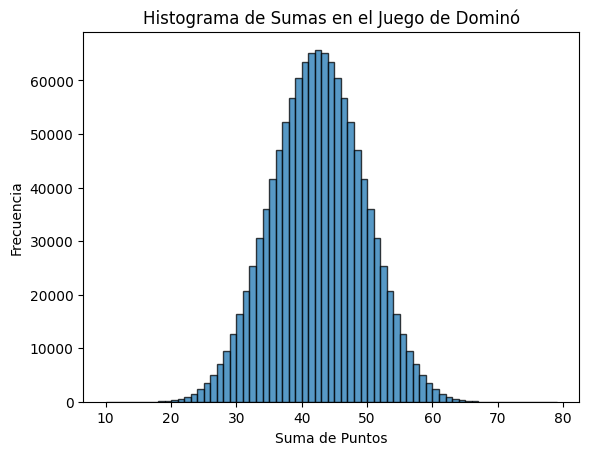

In [120]:
# Crea un histograma de la variable "suma"
plt.hist(tabla_sumas['suma'], bins=range(10, 80), alpha=0.75, edgecolor='k')

# Etiquetas y título
plt.xlabel('Suma de Puntos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Sumas en el Juego de Dominó')

# Muestra el histograma
plt.show()

In [123]:
import plotly.express as px
# Crea un histograma interactivo
fig = px.histogram(tabla_sumas, x='suma', title='Histograma de Sumas en el Juego de Dominó')

# Define etiquetas de los ejes
fig.update_xaxes(title_text='Suma de Puntos')
fig.update_yaxes(title_text='Frecuencia')

# Muestra el histograma interactivo
fig.show()






# Interpretación del caso

Contestar preguntas y describir con al menos 100 papabras lo aprendido del caso

